### Script - Loop Habit Data Analysis.ipynb

Analyses standardized Loop Habit data providing insight into habit completion rates based on user defined thresholds.

An xlsx file and a number of charts are outputted collectively showing key statistics for each of the habits.

### Modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pathlib import Path

In [3]:
import os

In [4]:
import datetime as dt

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

### Input xlsx file path to process

In [6]:
windowsfp = "D:\Documents\Habit Loops Data\RandomlyGeneratedHabitData - 2022-01-06 - Edited.xlsx"

### Input date to process from : best today -1 day or user specified date

In [7]:
# today - 1 day
#a = dt.datetime.today()
#oneday = dt.timedelta(days=1)
#a = a - oneday

# user specified date
a = dt.datetime(2021,12,31)
a

datetime.datetime(2021, 12, 31, 0, 0)

### Programme

In [8]:
windowsfp = windowsfp.strip('""')

In [9]:
p = Path(windowsfp)
print(p)

D:\Documents\Habit Loops Data\RandomlyGeneratedHabitData - 2022-01-06 - Edited.xlsx


In [10]:
os.chdir(p.parent)
Path.cwd()

WindowsPath('D:/Documents/Habit Loops Data')

In [11]:
df = pd.read_excel(p, index_col='Date')
df
# output = None

,Habit 1,Habit 2,Habit 3,Habit 4,Habit 5,Habit 6,Habit 7,Habit 8,Habit 9,Habit 10
Date,,,,,,,,,,
2022-01-06,0,2,0,2,2,2,2,2,2,2
2022-01-05,2,0,0,0,0,2,2,0,2,2
2022-01-04,2,2,2,0,2,0,0,0,2,0
2022-01-03,0,0,0,0,2,0,2,2,0,0
2022-01-02,2,0,2,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-01-05,0,2,0,2,2,2,2,2,2,0
2021-01-04,0,0,0,2,0,0,2,0,0,2
2021-01-03,2,0,0,2,2,0,2,2,0,0


In [12]:
list(df.columns)

['Habit 1',
 'Habit 2',
 'Habit 3',
 'Habit 4',
 'Habit 5',
 'Habit 6',
 'Habit 7',
 'Habit 8',
 'Habit 9',
 'Habit 10']

### User can specifiy which habits to drop from analysis

In [13]:
drophabits = []

In [14]:
for habit in drophabits:
    try:
        df.drop(labels = habit, axis = 1, inplace = True)
    except KeyError:
        continue

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 2022-01-06 to 2021-01-01
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Habit 1   371 non-null    int64
 1   Habit 2   371 non-null    int64
 2   Habit 3   371 non-null    int64
 3   Habit 4   371 non-null    int64
 4   Habit 5   371 non-null    int64
 5   Habit 6   371 non-null    int64
 6   Habit 7   371 non-null    int64
 7   Habit 8   371 non-null    int64
 8   Habit 9   371 non-null    int64
 9   Habit 10  371 non-null    int64
dtypes: int64(10)
memory usage: 31.9+ KB


In [16]:
# Checks that the unique values in the df for each of the habit columns are either 0 or 2

uniquedict = {}
for habit in list(df.columns):
    if habit == 'Date':
        continue
    uniquedict[habit] = df[habit].unique()

uniqueseries = pd.Series(uniquedict)
print(uniqueseries)

Habit 1     [0, 2]
Habit 2     [2, 0]
Habit 3     [0, 2]
Habit 4     [2, 0]
Habit 5     [2, 0]
Habit 6     [2, 0]
Habit 7     [2, 0]
Habit 8     [2, 0]
Habit 9     [2, 0]
Habit 10    [2, 0]
dtype: object


In [17]:
completion = pd.DataFrame(index=list(df.columns))
completion

""
Habit 1
Habit 2
Habit 3
Habit 4
Habit 5
Habit 6
Habit 7
Habit 8
Habit 9
Habit 10


In [18]:
def daterangecreator(s, e, p, f):
    dr = pd.date_range(start = s, end = e, periods = p, freq=f, )
    dr = dr.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
    dr.reverse()
    timeframelength = len(dr)
    return dr, timeframelength

### seven day performance

In [19]:
dr, tfl = daterangecreator(None, a, 7, 'D')
dr, tfl

(['2021-12-31',
  '2021-12-30',
  '2021-12-29',
  '2021-12-28',
  '2021-12-27',
  '2021-12-26',
  '2021-12-25'],
 7)

In [20]:
sevendaydf = df.loc[dr, :]
sevendaydf

,Habit 1,Habit 2,Habit 3,Habit 4,Habit 5,Habit 6,Habit 7,Habit 8,Habit 9,Habit 10
Date,,,,,,,,,,
2021-12-31,2,2,2,2,0,2,2,2,2,0
2021-12-30,0,2,2,2,0,0,2,2,2,0
2021-12-29,0,0,0,2,0,0,0,0,2,0
2021-12-28,0,0,2,0,0,2,2,2,2,0
2021-12-27,0,0,0,2,0,2,2,2,0,2
2021-12-26,0,2,0,0,2,2,2,0,0,0
2021-12-25,2,2,2,0,0,2,0,0,2,2


In [21]:
sdc = sevendaydf.sum()/2
sdc = sdc.astype(int)
sdc

Habit 1     2
Habit 2     4
Habit 3     4
Habit 4     4
Habit 5     1
Habit 6     5
Habit 7     5
Habit 8     4
Habit 9     5
Habit 10    2
dtype: int32

In [22]:
completion['sevenday'] = sdc
completion

,sevenday
Habit 1,2
Habit 2,4
Habit 3,4
Habit 4,4
Habit 5,1
Habit 6,5
Habit 7,5
Habit 8,4
Habit 9,5
Habit 10,2


In [23]:
completion['sevenday-tf'] = tfl
completion['sevenday-rate-%'] = round((completion['sevenday']/tfl) * 100, 1)
completion

,sevenday,sevenday-tf,sevenday-rate-%
Habit 1,2,7,28.6
Habit 2,4,7,57.1
Habit 3,4,7,57.1
Habit 4,4,7,57.1
Habit 5,1,7,14.3
Habit 6,5,7,71.4
Habit 7,5,7,71.4
Habit 8,4,7,57.1
Habit 9,5,7,71.4
Habit 10,2,7,28.6


### performance to date this month - %

In [24]:
a
monthstart = dt.datetime(a.year, a.month, 1)
monthstart

datetime.datetime(2021, 12, 1, 0, 0)

In [25]:
dr, tfl = daterangecreator(monthstart, a, None, 'D')
dr, tfl

(['2021-12-31',
  '2021-12-30',
  '2021-12-29',
  '2021-12-28',
  '2021-12-27',
  '2021-12-26',
  '2021-12-25',
  '2021-12-24',
  '2021-12-23',
  '2021-12-22',
  '2021-12-21',
  '2021-12-20',
  '2021-12-19',
  '2021-12-18',
  '2021-12-17',
  '2021-12-16',
  '2021-12-15',
  '2021-12-14',
  '2021-12-13',
  '2021-12-12',
  '2021-12-11',
  '2021-12-10',
  '2021-12-09',
  '2021-12-08',
  '2021-12-07',
  '2021-12-06',
  '2021-12-05',
  '2021-12-04',
  '2021-12-03',
  '2021-12-02',
  '2021-12-01'],
 31)

In [26]:
mtd = df.loc[dr, :]
mtd

,Habit 1,Habit 2,Habit 3,Habit 4,Habit 5,Habit 6,Habit 7,Habit 8,Habit 9,Habit 10
Date,,,,,,,,,,
2021-12-31,2,2,2,2,0,2,2,2,2,0
2021-12-30,0,2,2,2,0,0,2,2,2,0
2021-12-29,0,0,0,2,0,0,0,0,2,0
2021-12-28,0,0,2,0,0,2,2,2,2,0
2021-12-27,0,0,0,2,0,2,2,2,0,2
2021-12-26,0,2,0,0,2,2,2,0,0,0
2021-12-25,2,2,2,0,0,2,0,0,2,2
2021-12-24,2,2,2,2,2,2,2,0,0,2
2021-12-23,2,0,2,2,0,2,2,2,0,2


In [27]:
mtd = mtd.sum()/2
mtd = mtd.astype(int)
mtd

Habit 1     17
Habit 2     15
Habit 3     20
Habit 4     18
Habit 5     15
Habit 6     17
Habit 7     12
Habit 8     14
Habit 9     19
Habit 10    15
dtype: int32

In [28]:
completion['month-td'] = mtd
completion

,sevenday,sevenday-tf,sevenday-rate-%,month-td
Habit 1,2,7,28.6,17
Habit 2,4,7,57.1,15
Habit 3,4,7,57.1,20
Habit 4,4,7,57.1,18
Habit 5,1,7,14.3,15
Habit 6,5,7,71.4,17
Habit 7,5,7,71.4,12
Habit 8,4,7,57.1,14
Habit 9,5,7,71.4,19
Habit 10,2,7,28.6,15


In [29]:
completion['month-td-tf'] = tfl
completion['month-td-rate-%'] = round((completion['month-td']/tfl) * 100, 1)
completion

,sevenday,sevenday-tf,sevenday-rate-%,month-td,month-td-tf,month-td-rate-%
Habit 1,2,7,28.6,17,31,54.8
Habit 2,4,7,57.1,15,31,48.4
Habit 3,4,7,57.1,20,31,64.5
Habit 4,4,7,57.1,18,31,58.1
Habit 5,1,7,14.3,15,31,48.4
Habit 6,5,7,71.4,17,31,54.8
Habit 7,5,7,71.4,12,31,38.7
Habit 8,4,7,57.1,14,31,45.2
Habit 9,5,7,71.4,19,31,61.3
Habit 10,2,7,28.6,15,31,48.4


### performance to date this year - %

In [30]:
a
yearstart = dt.datetime(a.year, 1, 1)
yearstart

datetime.datetime(2021, 1, 1, 0, 0)

In [31]:
dr, tfl = daterangecreator(yearstart, a, None, 'D')
dr, tfl
output = None

In [32]:
ytd = df.loc[dr, :]
ytd

,Habit 1,Habit 2,Habit 3,Habit 4,Habit 5,Habit 6,Habit 7,Habit 8,Habit 9,Habit 10
Date,,,,,,,,,,
2021-12-31,2,2,2,2,0,2,2,2,2,0
2021-12-30,0,2,2,2,0,0,2,2,2,0
2021-12-29,0,0,0,2,0,0,0,0,2,0
2021-12-28,0,0,2,0,0,2,2,2,2,0
2021-12-27,0,0,0,2,0,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...
2021-01-05,0,2,0,2,2,2,2,2,2,0
2021-01-04,0,0,0,2,0,0,2,0,0,2
2021-01-03,2,0,0,2,2,0,2,2,0,0


In [33]:
ytd = ytd.sum()/2
ytd = ytd.astype(int)
ytd

Habit 1     170
Habit 2     188
Habit 3     187
Habit 4     181
Habit 5     180
Habit 6     166
Habit 7     200
Habit 8     174
Habit 9     184
Habit 10    181
dtype: int32

In [34]:
completion['year-td'] = ytd
completion

,sevenday,sevenday-tf,sevenday-rate-%,month-td,month-td-tf,month-td-rate-%,year-td
Habit 1,2,7,28.6,17,31,54.8,170
Habit 2,4,7,57.1,15,31,48.4,188
Habit 3,4,7,57.1,20,31,64.5,187
Habit 4,4,7,57.1,18,31,58.1,181
Habit 5,1,7,14.3,15,31,48.4,180
Habit 6,5,7,71.4,17,31,54.8,166
Habit 7,5,7,71.4,12,31,38.7,200
Habit 8,4,7,57.1,14,31,45.2,174
Habit 9,5,7,71.4,19,31,61.3,184
Habit 10,2,7,28.6,15,31,48.4,181


In [35]:
completion['year-td-tf'] = tfl
completion['year-td-rate-%'] = round((completion['year-td']/tfl) * 100, 1)
completion

,sevenday,sevenday-tf,sevenday-rate-%,month-td,month-td-tf,month-td-rate-%,year-td,year-td-tf,year-td-rate-%
Habit 1,2,7,28.6,17,31,54.8,170,365,46.6
Habit 2,4,7,57.1,15,31,48.4,188,365,51.5
Habit 3,4,7,57.1,20,31,64.5,187,365,51.2
Habit 4,4,7,57.1,18,31,58.1,181,365,49.6
Habit 5,1,7,14.3,15,31,48.4,180,365,49.3
Habit 6,5,7,71.4,17,31,54.8,166,365,45.5
Habit 7,5,7,71.4,12,31,38.7,200,365,54.8
Habit 8,4,7,57.1,14,31,45.2,174,365,47.7
Habit 9,5,7,71.4,19,31,61.3,184,365,50.4
Habit 10,2,7,28.6,15,31,48.4,181,365,49.6


In [36]:
a
currentdate = a.strftime('%d-%m-%Y')
currentmonth = a.strftime('%b')
currentyear = a.strftime('%Y')
currentdate, currentmonth, currentyear

('31-12-2021', 'Dec', '2021')

In [37]:
processedname = f'Data - Loop Habit Processed - {currentdate}' + p.suffix
processedname

'Data - Loop Habit Processed - 31-12-2021.xlsx'

In [38]:
processedfilepath = Path(processedname)
processedfilepath

WindowsPath('Data - Loop Habit Processed - 31-12-2021.xlsx')

In [39]:
completion.to_excel(excel_writer = processedfilepath)

### Thresholds

In [40]:
sevendaythreshold = 3 # 3 days a week
monthlythreshold = 50 # 50% a month
yearlythreshold = 50 # 50% a year

In [41]:
sevendaytitle = f'Seven Day Habit Completion - {currentdate}'

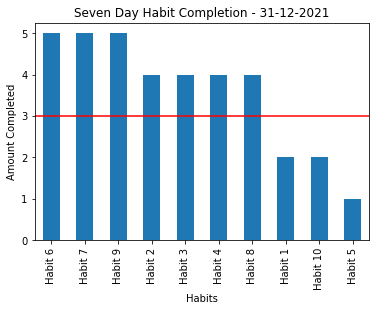

In [42]:
completion['sevenday'].sort_values(ascending=False).plot(kind = 'bar', xlabel ='Habits', ylabel = 'Amount Completed', title = sevendaytitle)
plt.axhline(y = sevendaythreshold, color = 'r')
plt.savefig(sevendaytitle, dpi = 300, bbox_inches = 'tight')

In [43]:
a
currentdate = a.strftime('%d-%m-%Y')
currentdate

'31-12-2021'

In [44]:
monthtdtitle = f'Month To Date Habit Completion Rate - {currentdate} - {currentmonth}'

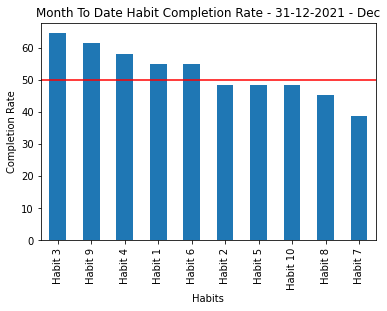

In [45]:
completion['month-td-rate-%'].sort_values(ascending=False).plot(kind = 'bar', xlabel ='Habits', ylabel = 'Completion Rate', title = monthtdtitle)
plt.axhline(y = monthlythreshold, color = 'r')
plt.savefig(monthtdtitle, dpi = 300, bbox_inches = 'tight')

In [46]:
yeartdtitle = f'Year To Date Habit Completion Rate - {currentdate} - {currentyear}'

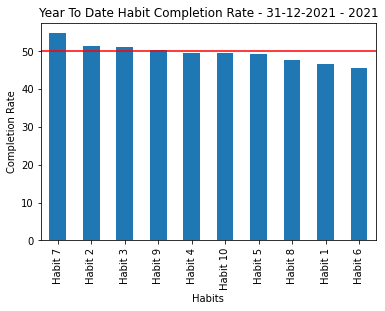

In [47]:
completion['year-td-rate-%'].sort_values(ascending=False).plot(kind = 'bar', xlabel ='Habits', ylabel = 'Completion Rate', title = yeartdtitle)
plt.axhline(y = yearlythreshold, color = 'r')
plt.savefig(yeartdtitle, dpi = 300, bbox_inches = 'tight')

In [48]:
completion

,sevenday,sevenday-tf,sevenday-rate-%,month-td,month-td-tf,month-td-rate-%,year-td,year-td-tf,year-td-rate-%
Habit 1,2,7,28.6,17,31,54.8,170,365,46.6
Habit 2,4,7,57.1,15,31,48.4,188,365,51.5
Habit 3,4,7,57.1,20,31,64.5,187,365,51.2
Habit 4,4,7,57.1,18,31,58.1,181,365,49.6
Habit 5,1,7,14.3,15,31,48.4,180,365,49.3
Habit 6,5,7,71.4,17,31,54.8,166,365,45.5
Habit 7,5,7,71.4,12,31,38.7,200,365,54.8
Habit 8,4,7,57.1,14,31,45.2,174,365,47.7
Habit 9,5,7,71.4,19,31,61.3,184,365,50.4
Habit 10,2,7,28.6,15,31,48.4,181,365,49.6


In [49]:
# Total amount of habits tracked
totalhabitstracked = len(list(completion.index))
totalhabitstracked

10

In [50]:
# Habits below seven day threshold
sevendaymask = (completion['sevenday'] < sevendaythreshold)
completion[sevendaymask]

,sevenday,sevenday-tf,sevenday-rate-%,month-td,month-td-tf,month-td-rate-%,year-td,year-td-tf,year-td-rate-%
Habit 1,2,7,28.6,17,31,54.8,170,365,46.6
Habit 5,1,7,14.3,15,31,48.4,180,365,49.3
Habit 10,2,7,28.6,15,31,48.4,181,365,49.6


In [51]:
sevendaybelow = sevendaymask.sum()
sevendaybelow

3

In [52]:
# percentage below threshold
round((sevendaybelow/totalhabitstracked) * 100, 1)

30.0

In [53]:
# Habits below monthly threshold
monthlymask = (completion['month-td-rate-%'] < monthlythreshold)
completion[monthlymask]

,sevenday,sevenday-tf,sevenday-rate-%,month-td,month-td-tf,month-td-rate-%,year-td,year-td-tf,year-td-rate-%
Habit 2,4,7,57.1,15,31,48.4,188,365,51.5
Habit 5,1,7,14.3,15,31,48.4,180,365,49.3
Habit 7,5,7,71.4,12,31,38.7,200,365,54.8
Habit 8,4,7,57.1,14,31,45.2,174,365,47.7
Habit 10,2,7,28.6,15,31,48.4,181,365,49.6


In [54]:
monthlymask.sum()

5

In [55]:
# Habits below yearly threshold
yearlymask = (completion['year-td-rate-%'] < yearlythreshold)
completion[yearlymask]

,sevenday,sevenday-tf,sevenday-rate-%,month-td,month-td-tf,month-td-rate-%,year-td,year-td-tf,year-td-rate-%
Habit 1,2,7,28.6,17,31,54.8,170,365,46.6
Habit 4,4,7,57.1,18,31,58.1,181,365,49.6
Habit 5,1,7,14.3,15,31,48.4,180,365,49.3
Habit 6,5,7,71.4,17,31,54.8,166,365,45.5
Habit 8,4,7,57.1,14,31,45.2,174,365,47.7
Habit 10,2,7,28.6,15,31,48.4,181,365,49.6


In [56]:
yearlymask.sum()

6

In [57]:
'Programme Complete'

'Programme Complete'